In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [2]:
def load_csv_data(csv_files):
    """Load multiple CSV files into a list of DataFrames."""
    return [pd.read_csv(file) for file in csv_files]

def plot_accuracy_bar(df_list, labels):
    """Plot overall accuracy as a bar plot for multiple experiments."""
    accuracies = []

    for df in df_list:
        correct = (df['pred'] == df['true']).sum()
        total = len(df)
        accuracy = correct / total
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.bar(labels, accuracies, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Overall Accuracy for Multiple Experiments')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

def plot_confusion_matrices(df_list, labels):
    """Plot confusion matrices for multiple experiments."""
    for df, label in zip(df_list, labels):
        cm = confusion_matrix(df['true'], df['pred'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - {label}')
        plt.show()

def compute_classification_metrics(df_list, labels):
    """Compute accuracy, precision, recall, and F1-score for each model and return as DataFrame."""
    metrics = []

    for df, label in zip(df_list, labels):
        precision = precision_score(df['true'], df['pred'], zero_division=0)
        recall = recall_score(df['true'], df['pred'], zero_division=0)
        f1 = f1_score(df['true'], df['pred'], zero_division=0)
        accuracy = accuracy_score(df['true'], df['pred'])

        metrics.append({
            'Model': label,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

def plot_subplots(df_list, labels, metrics=('train_loss', 'val_accuracy'), figsize=(14, 5)):
    """Plot multiple CSVs with separate subplots for each metric."""
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for df, label in zip(df_list, labels):
        axes[0].plot(df[metrics[0]], label=label, marker='o')
        axes[1].plot(df[metrics[1]], label=label, marker='x')

    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)

    axes[1].set_title('Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].grid(True)

    for ax in axes:
        ax.legend()

    plt.suptitle('Comparison of Multiple Experiments')
    plt.tight_layout()
    plt.show()

Train Metrics

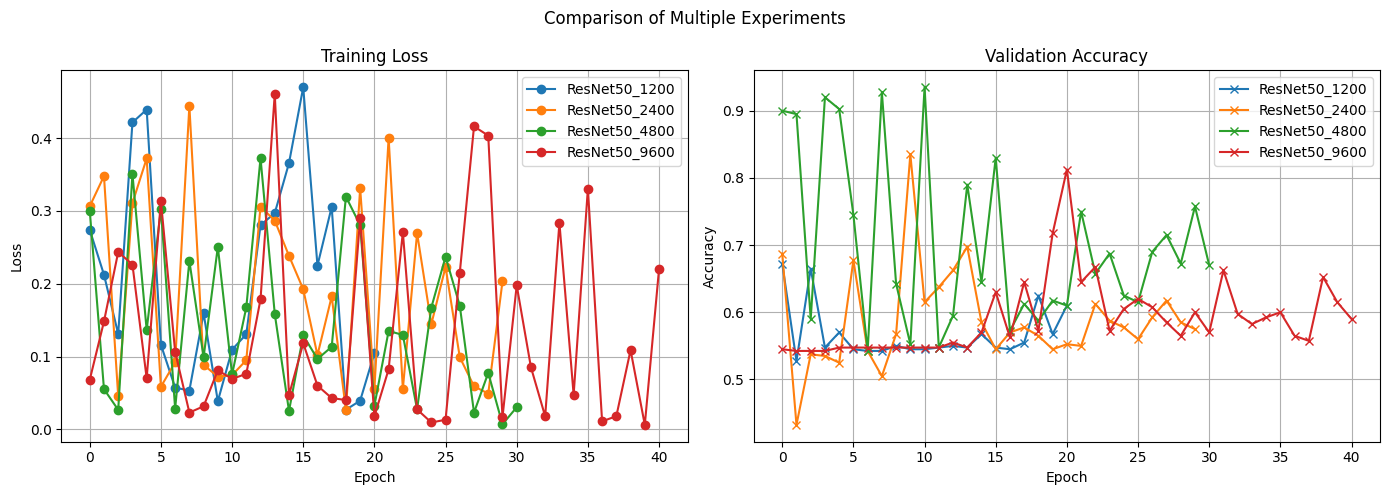

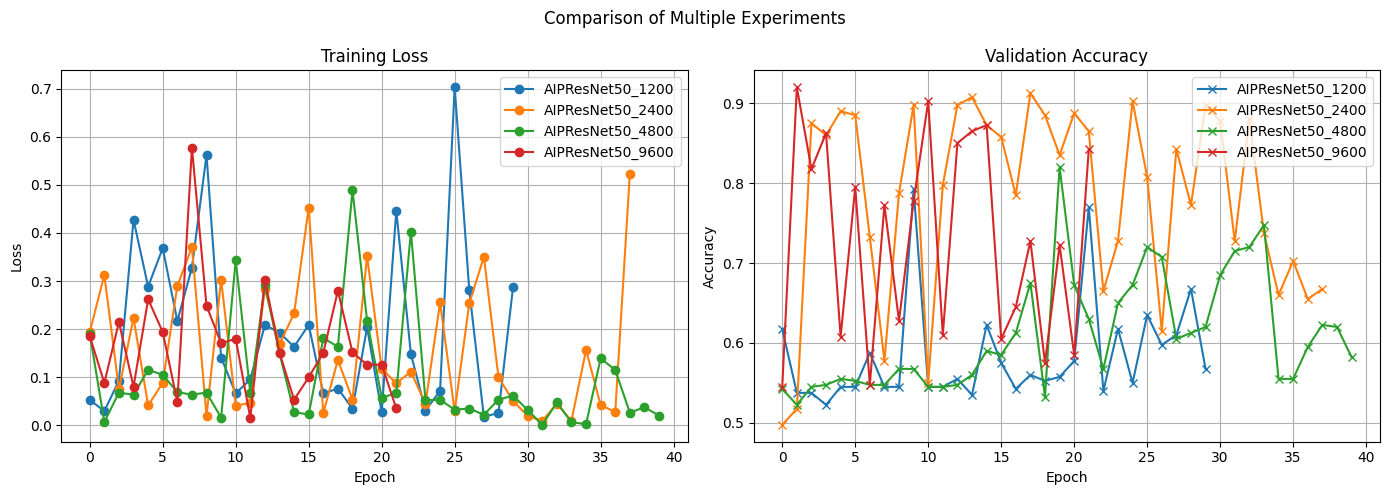

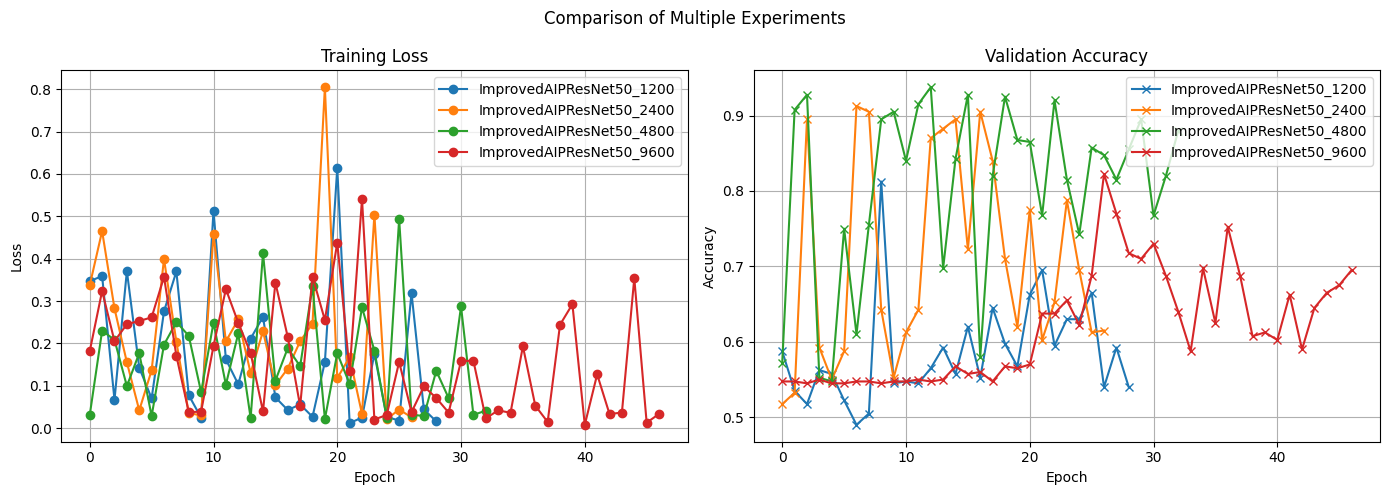

In [2]:
csv_files = [
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_1200/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_2400/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_4800/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_9600/metrics.csv',
]
labels = [
    'ResNet50_1200', 'ResNet50_2400','ResNet50_4800','ResNet50_9600'
]
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels)

csv_files = [
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_1200/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_2400/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_4800/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_9600/metrics.csv'
]
labels = [
    'AIPResNet50_1200', 'AIPResNet50_2400','AIPResNet50_4800','AIPResNet50_9600'
]
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels)

csv_files = [
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_1200/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_2400/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_4800/metrics.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_9600/metrics.csv'
]
labels = [
    'ImprovedAIPResNet50_1200','ImprovedAIPResNet50_2400','ImprovedAIPResNet50_4800','ImprovedAIPResNet50_9600'
]
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels)


Test metrics

In [3]:
csv_files = [
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ResNet50_9600/eval_results.csv',

    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/AIPResNet50_9600/eval_results.csv',

    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/caltech/ImprovedAIPResNet50_9600/eval_results.csv'
]

labels = [
    'ResNet50_1200', 'ResNet50_2400','ResNet50_4800','ResNet50_9600',
    'AIPResNet50_1200', 'AIPResNet50_2400','AIPResNet50_4800','AIPResNet50_9600',
    'ImprovedAIPResNet50_1200','ImprovedAIPResNet50_2400','ImprovedAIPResNet50_4800','ImprovedAIPResNet50_9600'
    ]


# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,ResNet50_1200,0.7675,0.836478,0.665,0.740947
1,ResNet50_2400,0.8775,0.871921,0.885,0.878412
2,ResNet50_4800,0.9075,0.865471,0.965,0.912530
3,ResNet50_9600,0.8725,0.849765,0.905,0.876513
4,AIPResNet50_1200,0.8725,0.840183,0.920,0.878282
5,AIPResNet50_2400,0.8800,0.855140,0.915,0.884058
6,AIPResNet50_4800,0.8775,0.829694,0.950,0.885781
7,AIPResNet50_9600,0.9000,0.904040,0.895,0.899497
8,ImprovedAIPResNet50_1200,0.8175,0.784753,0.875,0.827423
9,ImprovedAIPResNet50_2400,0.8900,0.902062,0.875,0.888325


In [4]:
csv_files = [
    '/data/luiz/dataset/EcoAIP/serengeti/ResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ResNet50_9600/eval_results.csv',

    '/data/luiz/dataset/EcoAIP/serengeti/AIPResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/AIPResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/AIPResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/AIPResNet50_9600/eval_results.csv',

    '/data/luiz/dataset/EcoAIP/serengeti/ImprovedAIPResNet50_1200/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ImprovedAIPResNet50_2400/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ImprovedAIPResNet50_4800/eval_results.csv',
    '/data/luiz/dataset/EcoAIP/serengeti/ImprovedAIPResNet50_9600/eval_results.csv'
]

labels = [
    'ResNet50_1200', 'ResNet50_2400','ResNet50_4800','ResNet50_9600',
    'AIPResNet50_1200', 'AIPResNet50_2400','AIPResNet50_4800','AIPResNet50_9600',
    'ImprovedAIPResNet50_1200','ImprovedAIPResNet50_2400','ImprovedAIPResNet50_4800','ImprovedAIPResNet50_9600'
    ]


# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,ResNet50_1200,0.97,0.97,1.0,0.984772
1,ResNet50_2400,0.97,0.97,1.0,0.984772
2,ResNet50_4800,0.97,0.97,1.0,0.984772
3,ResNet50_9600,0.97,0.97,1.0,0.984772
4,AIPResNet50_1200,0.97,0.97,1.0,0.984772
5,AIPResNet50_2400,0.97,0.97,1.0,0.984772
6,AIPResNet50_4800,0.97,0.97,1.0,0.984772
7,AIPResNet50_9600,0.97,0.97,1.0,0.984772
8,ImprovedAIPResNet50_1200,0.97,0.97,1.0,0.984772
9,ImprovedAIPResNet50_2400,0.97,0.97,1.0,0.984772
